In [542]:
import numpy as np
import random
import math
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sb
from IPython.display import Image

# Задача 2

### Случайная величина имеет экспоненциальный закон распределения


\begin{equation*} 
p(x) =
\begin{cases} 
e^{-x}, & x \geq 0, \\
0, & x < 0.
\end{cases}
\end{equation*} 
### Сгенерируйте выборку объема n = 25.  



### a) Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии.

In [543]:
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

def inverse_F(y: float) -> float:
    return -np.log(1-y)

def mu3(arr: pd.Series) -> float:
    res = 0.0
    arr_mean = arr.mean()
    for i in arr:
        res += (i - arr_mean)**3
    return res / len(arr)

N = 25 # Объем выборки

sampling = pd.Series(inverse_F(random.uniform(0, 1)) for _ in range(N)) # Выборка

sampling_median = sampling.median()
sampling_range = max(sampling) - min(sampling)
sampling_gamma = mu3(sampling) / np.std(sampling)**3

moda = set(sampling)
if len(moda) != 25:
    print(f"Мода: {Counter(sampling).most_common(1)[0][0]}")
else:
    print(f"Мода: вся выборка")
print(f"Медиана: {sampling_median}")
print(f"Размах: {sampling_range}")
print(f"Оценка коэффициента асимметрии: {sampling_gamma}")

Мода: вся выборка
Медиана: 0.6234063378790493
Размах: 3.4764891420780613
Оценка коэффициента асимметрии: 1.3561878372974465


### b) Построить эмпирическую функцию распределения, гистограмму, boxplot.

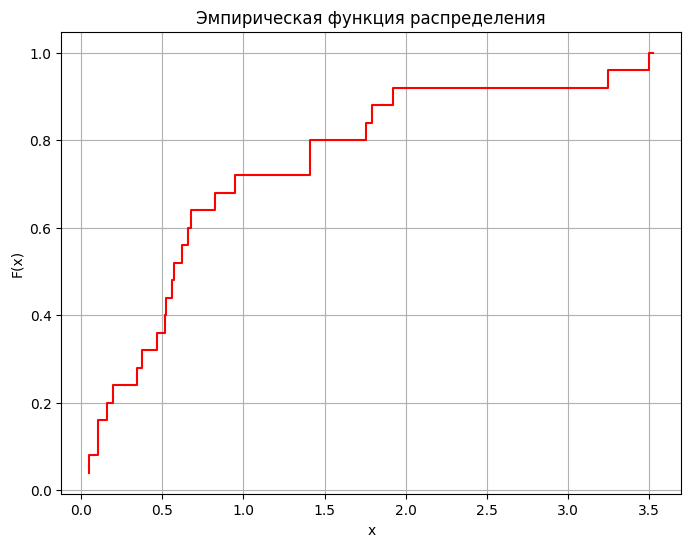

In [544]:
# Создаем график эмпирической функции распределения
plt.figure(figsize=(8,6))
x_vals = np.sort(sampling)
y_vals = np.arange(1, N + 1) / N
plt.step(x_vals, y_vals, color="red")

plt.title('Эмпирическая функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)
plt.show()

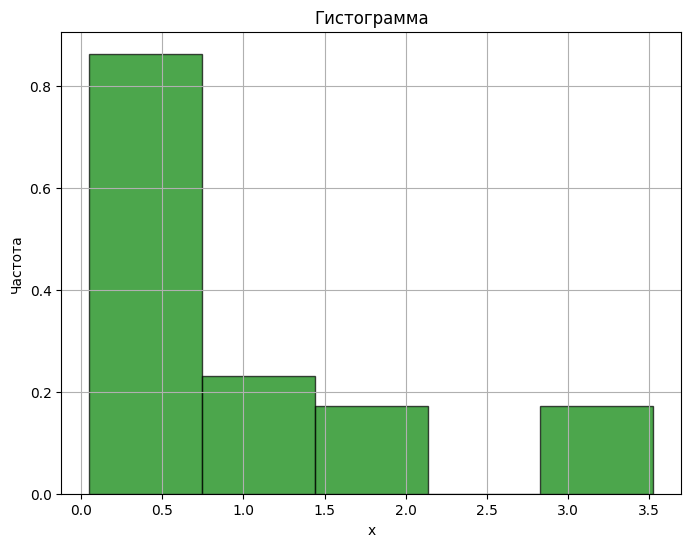

In [545]:
# Создаем гистограмму
plt.figure(figsize=(8,6))
plt.hist(sampling, alpha=0.7, bins=1+int(np.log2(N)), color = 'green', density=True, edgecolor = 'black')

plt.title('Гистограмма')
plt.xlabel('x')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

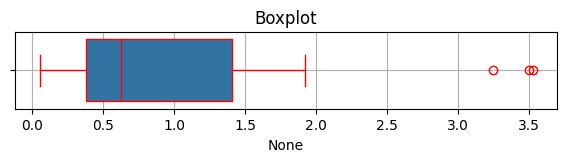

In [546]:
# Создаем boxplot
plt.figure(figsize=(7, 1))
sb.boxplot(x=sampling, linecolor="red")

plt.title("Boxplot")
plt.grid(True)
plt.show()

### c) Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью центральной предельной теоремы (ЦПТ), с бутстраповой оценкой этой плотности.

![](img/page_01.jpg)

![](img/page_02.jpg)

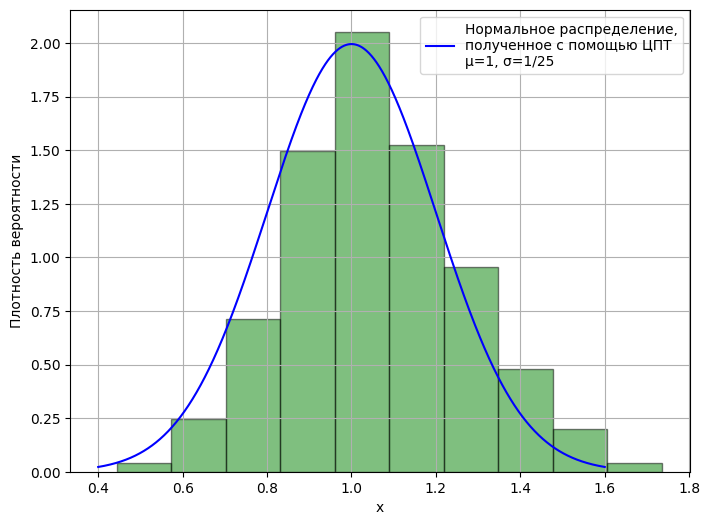

In [547]:
n = 1000
bootstrap_means = []

for i in range(n):
    s = np.random.choice(sampling, size=N)
    bootstrap_means.append(s.mean())

mu = 1
sigma = 1/5

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, n)
y = ss.norm.pdf(x, mu, sigma)

plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, alpha=0.5, bins=1+int(np.log2(n)), color = 'green', density=True, edgecolor = 'black')
plt.plot(x, y, label="Нормальное распределение,\nполученное с помощью ЦПТ\nμ=1, σ=1/25", color='blue')
plt.xlabel('x')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.legend()
plt.show()

### d) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1.

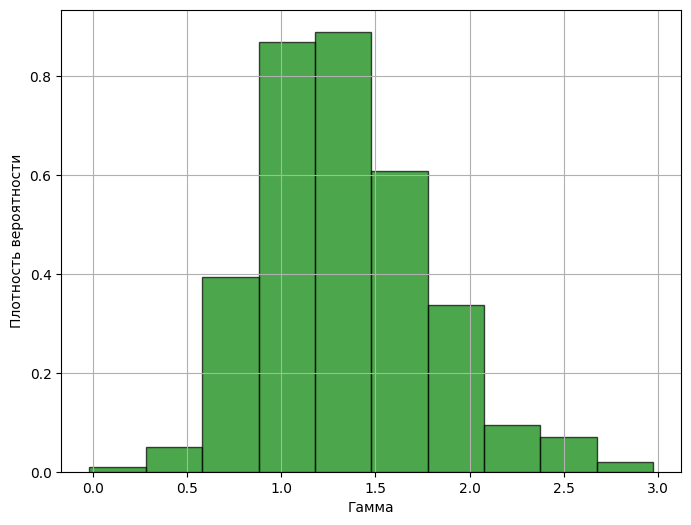

In [548]:
bootstrap_asymm_koef = []

for i in range(n):
    s = np.random.choice(sampling, size=N)
    bootstrap_asymm_koef.append(mu3(s)/(np.std(s))**3)

plt.figure(figsize=(8, 6))
plt.hist(bootstrap_asymm_koef, alpha=0.7, bins=1+int(np.log2(n)), color='green', density=True, edgecolor = 'black')
plt.xlabel('Гамма')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.show()

In [549]:

m = np.sum([1 if bootstrap_asymm_koef[i] < 1 else 0 for i in range(n)])

print("Оценка вероятности того, что коэффициент ассиметрии будет меньше 1:", m/n)

Оценка вероятности того, что коэффициент ассиметрии будет меньше 1: 0.22


### e) Сравнить плотность распределения медианы выборки с бутстраповой оценкой этой плотности.

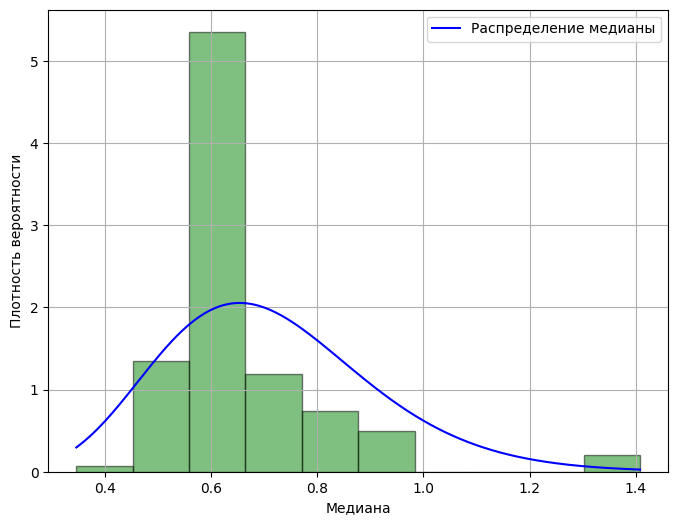

In [550]:
bootstrap_medians = []

for _ in range(n):
    s = np.random.choice(sampling, size=N)
    bootstrap_medians.append(np.median(s))

    
plt.figure(figsize=(8, 6))

x = np.linspace(min(bootstrap_medians), max(bootstrap_medians), n)
y = [N * p(z) * math.comb(N - 1, N // 2) * (1 - F(z))**(N - N // 2 - 1) * F(z)**(N // 2) for z in x]

plt.hist(bootstrap_medians, alpha=0.5, bins=1+int(np.log2(n)), color='green', density=True, edgecolor='black')
plt.plot(x, y, label="Распределение медианы", color='blue')
plt.xlabel('Медиана')
plt.ylabel('Плотность вероятности')
plt.grid(True)
plt.legend()
plt.show()